In [12]:
#Librerias para modelo de arboles de decision
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
#Cargo el dataset
df = pd.read_csv('Estudiantes_Desempeno.csv')

In [7]:
#Preprocesamiento de datos: Codifico las variables categoricas
encoder = LabelEncoder()
df['Participacion'] = encoder.fit_transform(df['Participacion'])
df['Desempeño'] = encoder.fit_transform(df['Desempeño'])

In [9]:
#Seleccionamos las caracteristicas y la variable objetivo
X = df[['HorasEstudio','Participacion', 'Asistencia']]
y = df['Desempeño']

In [10]:
#DCreamos y entrenamos el modelo de Arbol de Decision (ID3 o C4.5)
model = DecisionTreeClassifier(criterion='entropy', random_state=42) #Usamos entropia para ID3
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

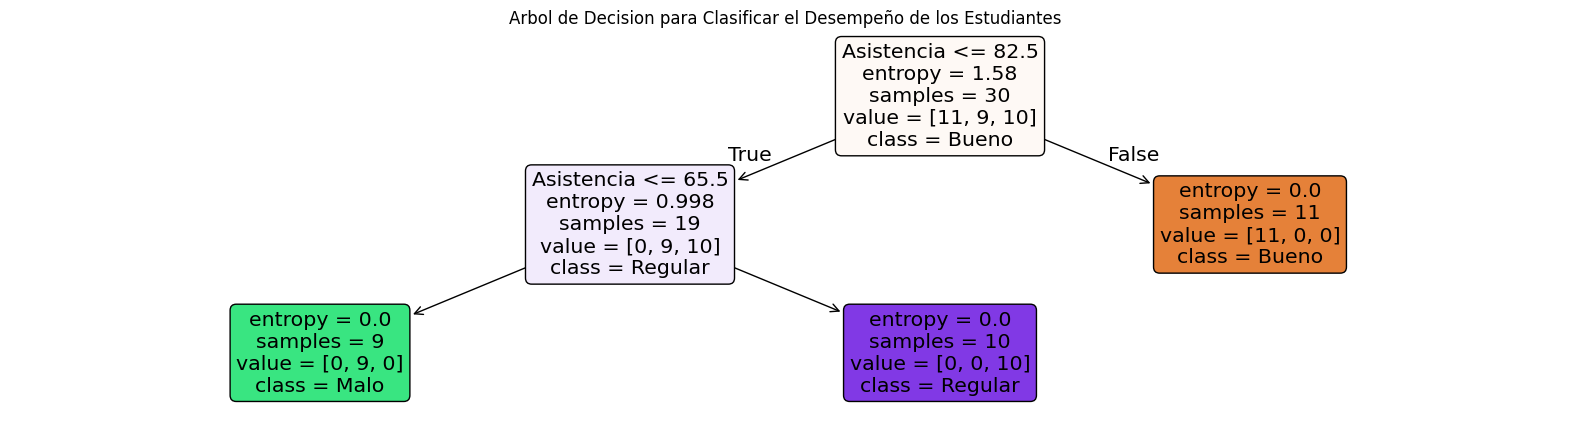

In [23]:
#Visualizamos el ARBOL DE DECISION
plt.figure(figsize=(20,5))
plot_tree(
    model,
    feature_names=['HorasEstudio','Participacion', 'Asistencia'],
    class_names=encoder.inverse_transform([0, 1, 2]),
    filled=True,
    rounded=True
)
plt.title('Arbol de Decision para Clasificar el Desempeño de los Estudiantes')
plt.show()

In [24]:
#Probamos el modelo con nuevos datos
nuevo_estudiante = [[12, 1, 88]] #12 horas de estudio, participacion 1, 88% de asistencia
prediccion = model.predict(nuevo_estudiante)
print(f"El desempeño del estudiante es: {encoder.inverse_transform(prediccion)}")

El desempeño del estudiante es: ['Bueno']


d:\Principal\Respaldo Diws 2020\Buap\Octavo Semestre\Mineria\practica 8\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
